### Ejercicio 1

#### Página 8

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img = cv2.imread('p8-rose.tif', cv2.IMREAD_UNCHANGED)

def decimar(imagen, factor):
    return imagen[::factor, ::factor]

# Factores de decimación
factores = [1, 2, 4, 8, 16, 32]

# Carpeta de salida
output_dir = "rosas decimadas"
os.makedirs(output_dir, exist_ok=True)

for f in factores:
    decimada = decimar(img, f)
    h, w = decimada.shape[:2]
    archivo = os.path.join(output_dir, f"imagen_{w}x{h}.tif")
    cv2.imwrite(archivo, decimada)
    # cv2.imshow las muestra en tamaño real
    cv2.imshow(f"{h}x{w}", decimada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Página 9

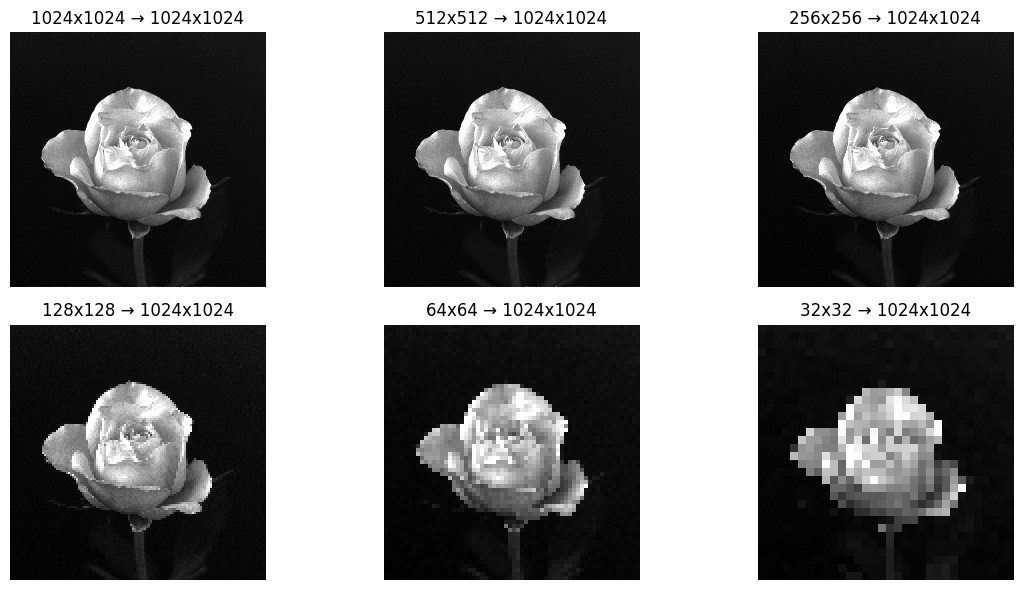

In [ ]:
# Dimensiones originales
h0, w0 = img.shape[:2]
target_size = (w0, h0)   # (ancho, alto)

factores = [1, 2, 4, 8, 16, 32]

output_dir = "rosas expandidas"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(12, 6))

for i, f in enumerate(factores, 1):
    decimada = decimar(img, f)
    h, w = decimada.shape[:2]

    # Expansión replicando píxeles hasta tamaño original usando cv2INTER_NEAREST
    expandida = cv2.resize(decimada, target_size, interpolation=cv2.INTER_NEAREST)

    archivo = os.path.join(output_dir, f"imagen_{w}x{h}_expandida.tif")
    cv2.imwrite(archivo, expandida)

    plt.subplot(2, 3, i)
    plt.imshow(expandida, cmap="gray", interpolation="none")
    plt.title(f"{w}x{h} → {w0}x{h0}")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Página 10

In [ ]:
img = cv2.imread('p10-building.jpg', cv2.IMREAD_UNCHANGED)

def decimar(imagen, factor):
    return imagen[::factor, ::factor]

# Factores de decimación
factores = [1, 2, 4, 8]

# Carpeta de salida
output_dir = "edificios decimadas"
os.makedirs(output_dir, exist_ok=True)

for f in factores:
    decimada = decimar(img, f)
    h, w = decimada.shape[:2]
    archivo = os.path.join(output_dir, f"imagen_{w}x{h}.tif")
    cv2.imwrite(archivo, decimada)
    # cv2.imshow las muestra en tamaño real
    cv2.imshow(f"{h}x{w}", decimada)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Página 11

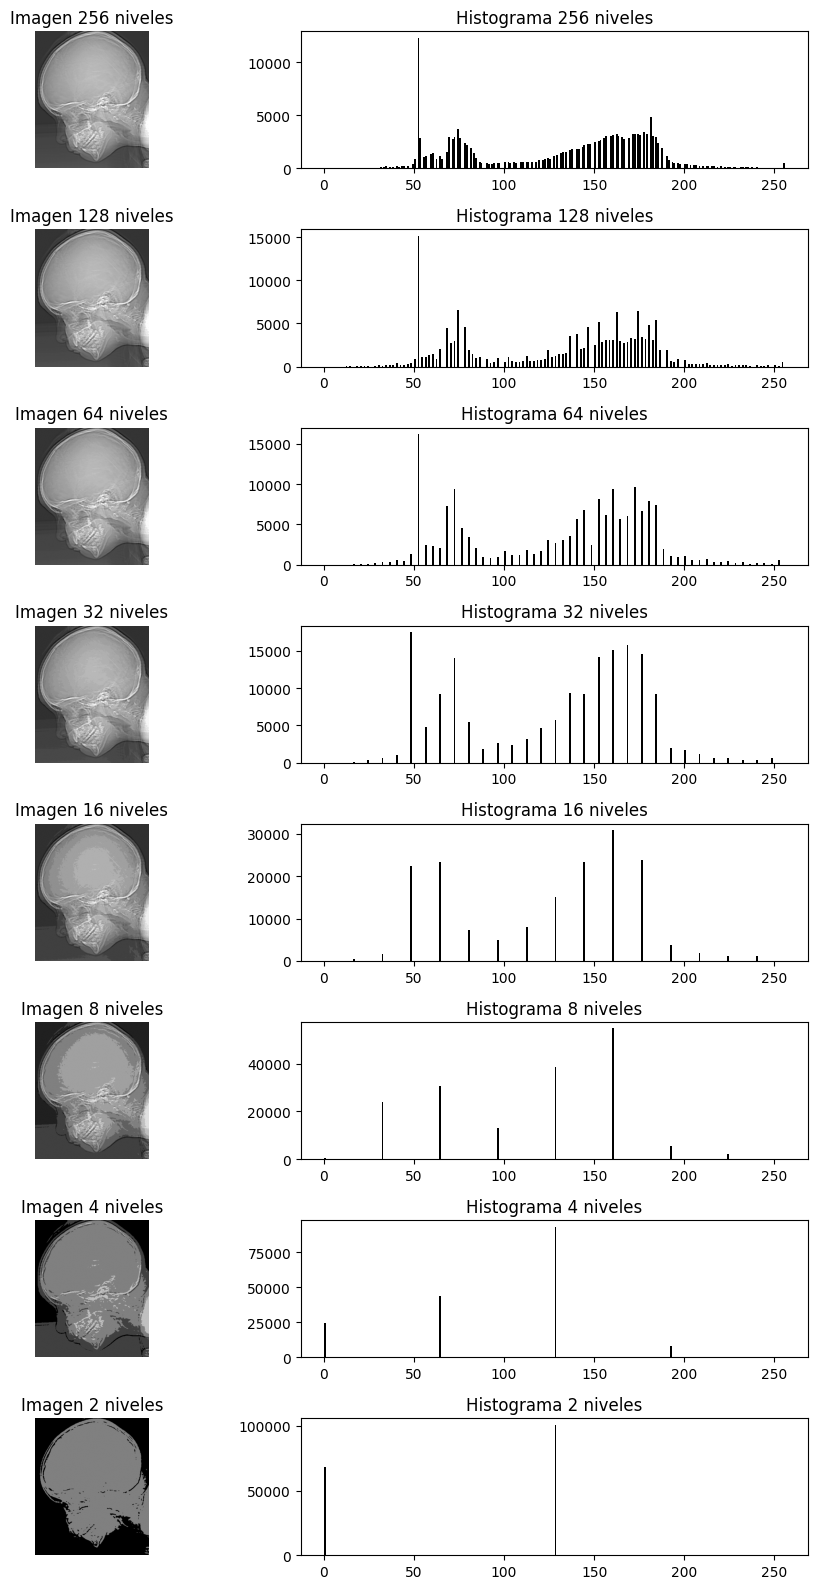

In [ ]:
img = cv2.imread("p11-skull.tif", cv2.IMREAD_GRAYSCALE)

output_dir = "skull niveles de grises"
os.makedirs(output_dir, exist_ok=True)

levels = [256, 128, 64, 32, 16, 8, 4, 2]

fig, axes = plt.subplots(len(levels), 2, figsize=(10, 2 * len(levels)))

for i, L in enumerate(levels):
    # Cuantización
    quantized = (img / (256 // L)).astype(np.uint8) * (256 // L)

    filename = os.path.join(output_dir, f"imagen_{L}niveles.tif")
    cv2.imwrite(filename, quantized)

    # Imagen en columna 1
    axes[i, 0].imshow(quantized, cmap="gray", vmin=0, vmax=255)
    axes[i, 0].set_title(f"Imagen {L} niveles")
    axes[i, 0].axis("off")

    # Histograma en columna 2
    axes[i, 1].hist(quantized.ravel(), bins=256, range=[0, 256], color="black")
    axes[i, 1].set_title(f"Histograma {L} niveles")

plt.tight_layout()
plt.show()

En el histograma de 2 niveles se observa claramente que la imagen toma como valor más bajo el 0 pero no toma el 255 como valor más alto, con lo cual queda desaprovechado el contraste que podría tener la imagen de 2 niveles.

Para solucionar esto se propone otra forma de tratar a la imagen, escalándola al rango [0, L-1] y luego cuantizándola para lograr una distribución uniforme:

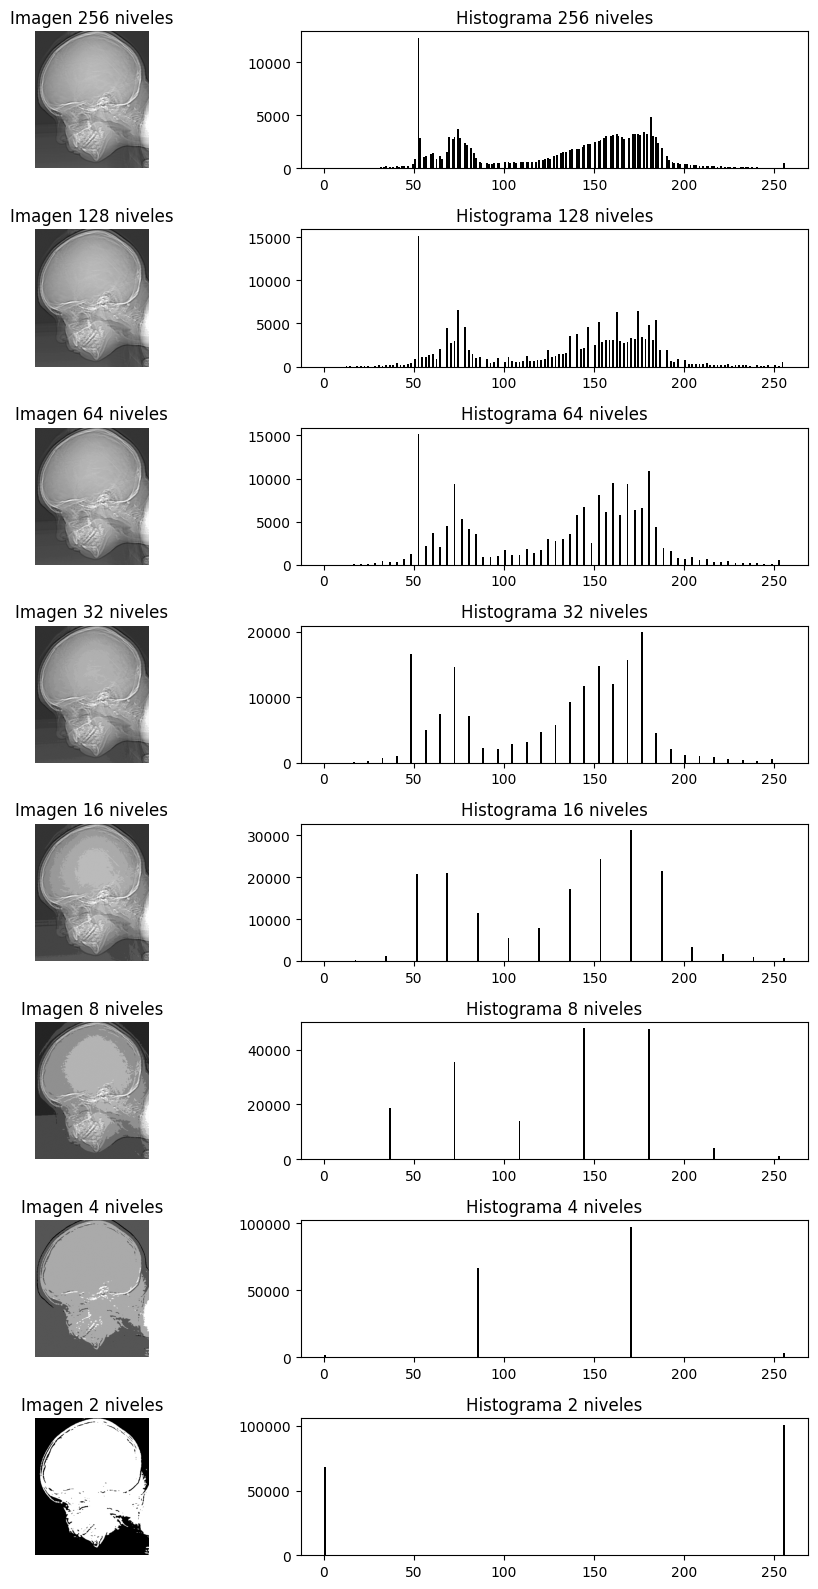

In [ ]:
output_dir = "skull niveles de grises (uniforme)"
os.makedirs(output_dir, exist_ok=True)

fig, axes = plt.subplots(len(levels), 2, figsize=(10, 2 * len(levels)))

for i, L in enumerate(levels):
    # Escalar imagen a rango [0, L-1]
    img_scaled = (img.astype(np.float32) / 255.0) * (L - 1)
    img_scaled = np.round(img_scaled).astype(np.uint8)

    # Mapear a valores equiespaciados en [0, 255]
    quantized = (img_scaled * (255 // (L - 1))).astype(np.uint8)

    filename = os.path.join(output_dir, f"imagen_{L}niveles uniforme.tif")
    cv2.imwrite(filename, quantized)

    # Imagen en columna 1
    axes[i, 0].imshow(quantized, cmap="gray", vmin=0, vmax=255)
    axes[i, 0].set_title(f"Imagen {L} niveles")
    axes[i, 0].axis("off")

    # Histograma en columna 2
    axes[i, 1].hist(quantized.ravel(), bins=256, range=[0, 256], color="black")
    axes[i, 1].set_title(f"Histograma {L} niveles")

plt.tight_layout()
plt.show()

### Ejercicio 4

La transformada de Fourier $\mathcal{F}$ de una señal $x(t)$ se puede expresar según
$$X(\omega) = \int x(t)~e^{-j\omega t}~dt$$
donde $j$ es la unidad imaginaria.

En caso de trasladar la señal una cantidad $d$, la transformada se vuelve
$$\mathcal{F}[x(t-d)] = \int x(t-d)~e^{-j\omega (t-d)}~dt = e^{j\omega d}\int x(t-d)~e^{-j\omega t}~dt$$
y haciendo un cambio de variable $k = t-d$ la integral se transforma en $\int x(k)~e^{-j\omega k}~dk = X(\omega)$, ya que es la misma integral que antes solo que con distinta variable de integración.

Así, resulta
$$\mathcal{F}[x(t-d)] = X(\omega)~e^{j\omega d} $$
de modo que la transformada de Fourier de una señal desplazada solamente introduce un factor de fase en el dominio de la frecuencia, sin alterarse la magnitud $X(\omega)$.

El caso de la 2D-DFT de una señal trasladada en $x$ y en $y$ resulta análogo, cambiando la integral por una sumatoria en este caso hasta $M$ y $N$. Como $b$ es producto de trasladar $a$ un $\Delta x$ y un $\Delta y$, se puede reescribir
$$i_b (x,y) = i_a(x-\Delta x, y - \Delta y).$$

La 2D-DFT de $i_a(x,y)$ es 
$$I_a(u,v) = \frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} i_a(x,y) e^{-j2\pi (\frac{ux}{M}+\frac{vy}{N})}$$

y la 2D-DFT de $i_b(x,y)$ se puede reescribir en función de $I_a(u,v)$ según 
$$I_b(u,v) = I_a(u,v)~ e^{j2\pi (\frac{u\Delta x}{M}+\frac{v\Delta y}{N})}.$$

Así, el producto elemento a elemento resulta
$$I_a(u,v)\otimes I_b^*(u,v) = |I_a(u,v)|^2 ~ e^{-j2\pi (\frac{u\Delta x}{M}+\frac{v\Delta y}{N})}$$
y al dividir por el módulo del producto
$$R(u,v) = \frac{I_a(u,v)\otimes I_b^*(u,v)}{|I_a(u,v)\otimes I_b^*(u,v)|} = e^{-j2\pi (\frac{u\Delta x}{M}+\frac{v\Delta y}{N})}$$
ya que al estar escrito en su forma polar, el módulo es directamente $|I_a(u,v)|^2$.

Ahora, la transformada inversa de $R(u,v)$ se vuelve
$$r(x,y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} R(u,v)~e^{j2\pi (\frac{ux}{M}+\frac{vy}{N})}$$
y reemplazando lo calculado hasta ahora
$$r(x,y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} e^{-j2\pi (\frac{u\Delta x}{M}+\frac{v\Delta y}{N})} ~ e^{j2\pi (\frac{ux}{M}+\frac{vy}{N})} = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} e^{j2\pi (\frac{u(x-\Delta x)}{M}+\frac{v(y-\Delta y)}{N})}.$$

Así, $r(x,y)$ se puede separar en dos sumatorias, y utilizando la identidad trigonométrica de un [núcleo de Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_kernel):
$$\sum_{k=0}^{N-1} e^{ikx} = e^{\frac{ix(N-1)}{2}}\frac{\sin(Nx/2)}{\sin(x/2)}$$
y reescribiendo $a = (x-\Delta x)/M$ y $b=(y- \Delta y)/N$:
$$r(x,y) = e^{j2\pi(a+b)} ~ \frac{\sin(M\pi a)}{\sin (\pi a)} ~ \frac{\sin(N\pi b)}{\sin (\pi b)}.$$

Para tomar el máximo de $r(x,y)$ puedo ver cuándo su módulo es máximo:
$$|r(x,y)| = \left|\frac{\sin(M\pi a)}{\sin (\pi a)} ~ \frac{\sin(N\pi b)}{\sin (\pi b)}\right|$$
y siendo el límite
$$\lim_{x\rightarrow 0} \frac{\sin(knx)}{\sin(nx)} = k$$
para cualquier $n \in \mathbb{Z}$. Como $M$ y $N$ son las dimensiones de la imagen (números enteros mayores a 1), el valor máximo de $r(x,y)$ se dará siempre que $a$ y $b$ sean múltiplos de $M$ y $N$ respectivamente, es decir:
$$a \in \mathbb{Z} \iff x-\Delta x \equiv 0 ~ (\mathrm{mod}~M)$$
$$b \in \mathbb{Z} \iff y-\Delta y \equiv 0 ~ (\mathrm{mod}~N)$$

En estos términos, se puede pensar a la función $r(x,y)$ como una $\delta$
$$r(x,y) = \delta(x-\Delta x~(\mathrm{mod}~M), y-\Delta y ~ (\mathrm{mod}~N))$$
y buscar las coordenadas de los picos
$$(x_p, y_p) = (\Delta x~(\mathrm{mod}~M), \Delta y ~ (\mathrm{mod}~N))$$
a partir del argumento máximo sobre $|r(x,y)|$.






In [2]:
import numpy as np

def desplazamiento(a, b):
    N, M = a.shape # Devuelve (filas, columnas), no (x,y)
    A = np.fft.fft2(a)
    B = np.fft.fft2(b)
    R = A * np.conj(B)           
    denom = np.abs(R)
    R_norm = R / denom
    r = np.fft.ifft2(R_norm)
    r_abs = np.abs(r)
    
    # Ubicación del pico
    peak_idx = np.unravel_index(np.argmax(r_abs), r_abs.shape)
    py, px = peak_idx
    
    # Convertir pico a valores en [-M/2, M/2] y [-N/2, N/2]
    # para evaluar el sentido del desplazamiento de la imagen
    if px > M//2:
        pm_signed = px - M
    else:
        pm_signed = px
    if py > N//2:
        pn_signed = py - N
    else:
        pn_signed = py
    
    Delta_x = pm_signed
    Delta_y = pn_signed
    
    print(f"Desplazamiento estimado: (Delta_x, Delta_y) = ({Delta_x}, {Delta_y})")

    return (Delta_x, Delta_y), r, r_abs

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

imga = cv2.imread('dog1ss.jpg', cv2.IMREAD_GRAYSCALE)
imgb = cv2.imread('dog2ss.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('dog1ss.jpg', imga)
cv2.imshow('dog2ss.jpg', imgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
desplazamiento(imga, imgb) # De imgb con respecto a imga

Desplazamiento estimado: (Delta_x, Delta_y) = (-337, 22)


((np.int64(-337), np.int64(22)),
 array([[-2.87684692e-04+2.86237625e-17j,  1.29285936e-03-1.60898930e-17j,
          8.11682592e-04-4.50250647e-17j, ...,
          2.30607267e-03+3.18919216e-17j,  1.03846100e-04-5.56571354e-17j,
          7.88245903e-04+9.70686542e-18j],
        [-1.37217353e-03-1.35192862e-17j,  7.37573485e-04-6.15798874e-18j,
          3.79202280e-04+5.74266087e-17j, ...,
         -1.44714201e-04-1.70950989e-17j, -5.16244623e-04+1.62254340e-17j,
          7.35220426e-04+6.70443199e-18j],
        [ 3.35882696e-03+5.88726845e-17j, -5.65993809e-04-4.03205250e-17j,
          1.81369151e-04-2.95331830e-17j, ...,
         -4.64568832e-04-1.22953101e-17j, -3.55404967e-04-1.18542305e-17j,
         -5.20320723e-04-1.19198542e-17j],
        ...,
        [-7.81375695e-05-9.71378296e-17j,  6.14451335e-04+5.98580777e-17j,
         -5.20008065e-04-8.50177207e-18j, ...,
          1.86695667e-04+3.88663663e-17j,  3.09257340e-03+2.05286449e-17j,
         -9.53107545e-04+1.52049836e-

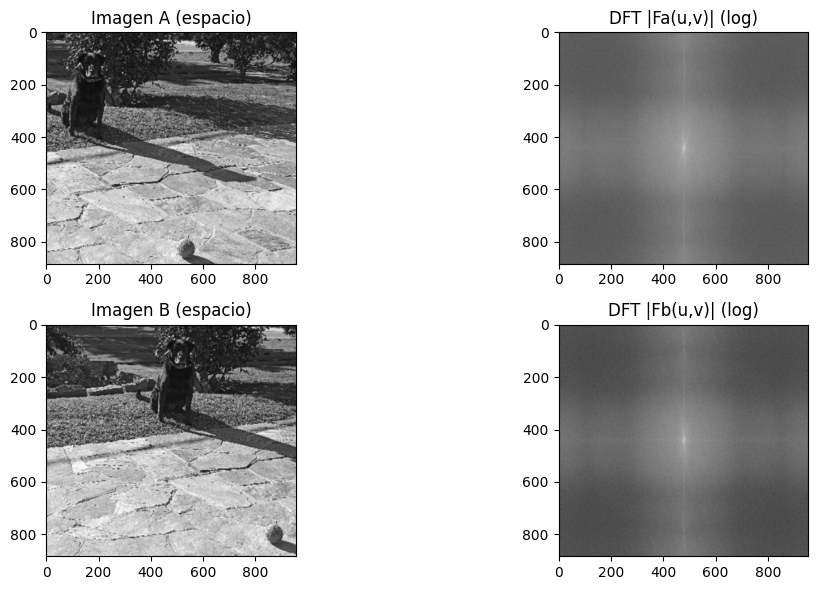

In [5]:
# Invariancia antre traslaciones de la 2D DFT

# Calcular la DFT 2D usando FFT
Fa = np.fft.fft2(imga)
Fb = np.fft.fft2(imgb)

# Desplazar el cero de la frecuencia al centro de la imagen
Fa_shift = np.fft.fftshift(Fa)
Fb_shift = np.fft.fftshift(Fb)

# Calcular magnitudes en escala logarítmica
magFa = np.log1p(np.abs(Fa_shift))
magFb = np.log1p(np.abs(Fb_shift))

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(imga, cmap='gray')
plt.title("Imagen A (espacio)")

plt.subplot(2,2,2)
plt.imshow(magFa, cmap='gray')
plt.title("DFT |Fa(u,v)| (log)")

plt.subplot(2,2,3)
plt.imshow(imgb, cmap='gray')
plt.title("Imagen B (espacio)")

plt.subplot(2,2,4)
plt.imshow(magFb, cmap='gray')
plt.title("DFT |Fb(u,v)| (log)")

plt.tight_layout()
plt.show()